In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/scpy2/")))

from scpy2.utils.nbmagics import install_magics
install_magics()
del install_magics

D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
d:\09_Work\Jun_Workspace\Python_Scientific_Computing_Best_Practices\繁中程式碼\codes\scpy2\utils\program_finder.py:25: UserWarning: Inkscape not found
  warnings.warn("Inkscape not found")


In [2]:
import numpy as np
%matplotlib inline
import pylab as pl

### 操作多維陣列

表2-8 本節介紹的函數
| 函數名稱 | 功能 |
|---------|------|
| concatenate() | 連接多個陣列 |
| vstack() | 沿第 0 軸連接陣列 |
| hstack() | 沿第 1 軸連接陣列 |
| column_stack() | 按列連接多個一維陣列 |
| split(), array_split() | 將陣列分為多段 |
| transpose() | 重新設定軸的順序 |
| swapaxes() | 交換兩個軸的順序 |

`concatenate()` 是連接多個陣列的最基本的函數，其他函數都是它的快速版本。它的第一個參數是包含多個陣列的序列，它將沿著 `axis` 參數指定的軸(預設為第 0 軸)連接陣列。所有這些陣列的形狀除了第 `axis` 軸之外都相同。

`vstack()` 沿著第 0 軸連接陣列。當被連接的陣列是長度為 N 的一維陣列時，將其形狀改為 (1, N)。

`hstack()` 沿著第 1 軸連接陣列。當所有陣列都是一維時，沿著第 0 軸連接陣列，因此結果陣列仍然為一維的。

`column_stack()` 和 `hstack()` 類似，沿著第 1 軸連接陣列，但是當陣列為一維時，將其形狀改為 (N, 1) ，經常用於按列連接多個一維陣列。

In [3]:
a = np.arange(3)
b = np.arange(10, 13)

v = np.vstack((a, b))
h = np.hstack((a, b))
c = np.column_stack((a, b))
%C v; h; c

      v                    h                  c     
--------------  ------------------------  ----------
[[ 0,  1,  2],  [ 0,  1,  2, 10, 11, 12]  [[ 0, 10],
 [10, 11, 12]]                             [ 1, 11],
                                           [ 2, 12]]


此外，`c_[]` 物件也可以用於按列連接陣列：

In [4]:
np.c_[a, b, a+b]

array([[ 0, 10, 10],
       [ 1, 11, 12],
       [ 2, 12, 14]])

`split()` 和 `array_split()` 的用法大致相同，將一個陣列沿著指定軸分成多個陣列，可以直接指定切分軸上的切分點索引。下面的程式把亂碼數組 a 切分為多個陣列，保障每個陣列中的元素都是昇冪排列的。注意透過 `diff()` 和 `nonzero()` 獲得的索引是每個昇冪片段中最後一個元素的索引，而切分點為每個片段第一個元素的索引，因此需要 +1。

In [5]:
#%hide
np.set_printoptions(linewidth=25)

In [6]:
np.random.seed(42)
a = np.random.randint(0, 10, 12)
idx = np.nonzero(np.diff(a) < 0)[0] + 1
%C a; idx; np.split(a, idx)

           a                      idx            np.split(a, idx) 
------------------------  --------------------  ------------------
[6, 3, 7, 4, 6, 9, 2, 6,  [ 1,  3,  6,  9, 10]  [array([6]),      
 7, 4, 3, 7]                                     array([3, 7]),   
                                                 array([4, 6, 9]),
                                                 array([2, 6, 7]),
                                                 array([4]),      
                                                 array([3, 7])]   


當第二個參數為整數時，表示分組個數。`split()` 只能平均分組，而 `array_split()` 能儘量平均分組：

In [7]:
%C np.split(a, 6); np.array_split(a, 5)

 np.split(a, 6)  np.array_split(a, 5)
---------------  --------------------
[array([6, 3]),  [array([6, 3, 7]),  
 array([7, 4]),   array([4, 6, 9]),  
 array([6, 9]),   array([2, 6]),     
 array([2, 6]),   array([7, 4]),     
 array([7, 4]),   array([3, 7])]     
 array([3, 7])]                      


`transpose()` 和 `swapaxes()` 用於修改軸的順序，它們獲得的是原陣列的視圖。

`transpose()` 透過其第二個參數 `axes` 指定軸的順序，預設時表示將整個形狀翻轉。而 `swapaxes()` 透過兩個整數指定調換順序的軸。在下面的實例中：
- `transpose()` 的結果陣列的形狀為 (3,4,2,5) ，它們分別位於原陣列形狀(2,3,4,5)的(1,2,0,3)索引位置處。
- `swapaxes()` 的結果陣列的形狀為(2,4,3,5)，它是透過將原陣列形狀的中間兩個軸交換獲得的。

In [8]:
a = np.random.randint(0, 10, (2, 3, 4, 5))
print( u"原陣列形狀:", a.shape )
print( u"transpose:", np.transpose(a, (1, 2, 0, 3)).shape )
print( u"swapaxes:", np.swapaxes(a, 1, 2).shape )

原陣列形狀: (2, 3, 4, 5)
transpose: (3, 4, 2, 5)
swapaxes: (2, 4, 3, 5)


下面以將多個縮圖拼成一幅大圖為例，幫助了解多維陣列中轉換軸的順序。在 `data/thumbnails` 目錄下有 30 個 160x90 像素的 PNG 圖示影像，需要將這些影像拼成一幅 6 行 5 列的大影像。首先呼叫 glob 和 cv2 模組中的函數，獲得一個陣列清單 imgs。cv2 函數庫將在後面介紹。

In [10]:
import glob
import numpy as np
from cv2 import imread, imwrite

imgs = []
for fn in glob.glob("thumbnails/*.png"):
    imgs.append(imread(fn, -1))
    
print( imgs[0].shape )

(90, 160, 3)


imgs 中每個元素都是一個多維陣列，它的形狀為 (90, 160, 3) ，其中第 0 軸的長度為影像的高度，第 1 軸的長度為影像的寬度，第 2 軸為影像的通道數，彩色影像包含紅、綠、藍三個通道，所以第 2 軸的長度為 3。

呼叫 `concatenate()` 將這些陣列沿第 0 軸拼成一個大陣列，結果 img 是一個寬為 160 像素、高為 2700 像素的影像：

In [11]:
img = np.concatenate(imgs, 0)
img.shape

(2700, 160, 3)

由於我們最後的目標是把它們拼成一個 6 行 5 列的縮圖，因此需要將 img 的第 0 軸分解為 3 個軸，長度分別為 (6, 5, 90)。下面使用 `reshape()` 完成這個工作。使用 `img1[i,j]` 可以取得第 i 行、第 j 列上的影像：

In [12]:
img1 = img.reshape(6, 5, 90, 160, 3)
img1[0, 1].shape

(90, 160, 3)

根據靶心圖表的大小，可以算出目標陣列的形狀為 (540, 800, 3) ，即 `(6*90, 5*160, 3)`，也可以把它看作形狀為 (6, 90, 5, 160, 3) 的多維陣列。與 img1 的形狀相比，可以看出需要交換 img1 的第 1 軸和第 2 軸。這個操作可以透過 `img1.swapaxes()` 或 `img1.transpose()` 完成。然後再透過 `reshape()` 將陣列的形狀改為 (540, 800, 3)。

In [13]:
img2 = img1.swapaxes(1, 2).reshape(540, 800, 3)

請思考下面的 img3 會獲得怎樣的影像：

In [14]:
img = np.concatenate(imgs, 0)
img3 = img.reshape(5, 6, 90, 160, 3) \
          .transpose(1, 2, 0, 3, 4)  \
          .reshape(540, 800, 3)

下面的程式將每幅縮圖的邊沿上的兩個像素填充為白色，效果如e下圖(右)所示。  
❶ 這裡使用一個形狀與 img1 的前 4 個軸相同的 mask 布林陣列，該陣列的初值為 True。  
❷ 透過切片將 mask 中除去邊框的部分設定為 False。  
❸ 將 img1 中與 mask 為 True 的對應像素填充為白色。   

In [16]:
img = np.concatenate(imgs, 0)
img1 = img.reshape(6, 5, 90, 160, 3)
mask = np.ones(img1.shape[:-1], dtype=bool) #❶
mask[:, :, 2:-2, 2:-2] = False              #❷
img1[mask] = 230                            #❸
img4 = img1.swapaxes(1, 2).reshape(540, 800, 3)

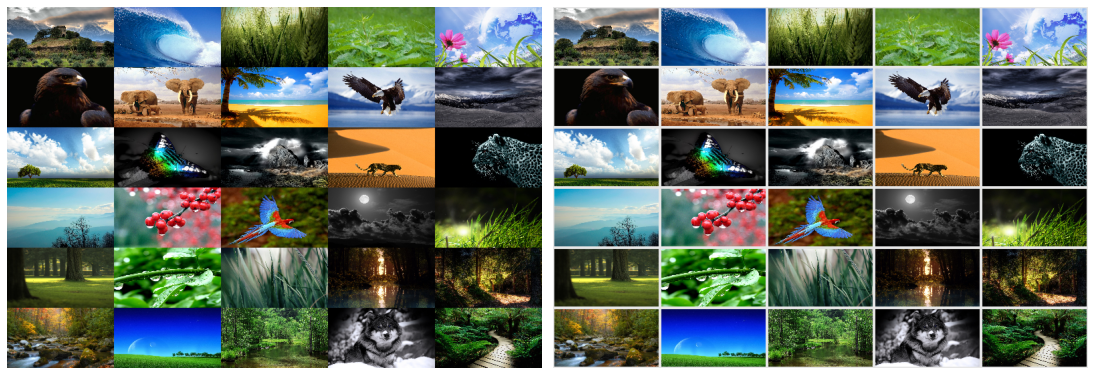

In [17]:
#%figonly=使用動作多維陣列的函數拼接多幅縮圖
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(15, 6))
ax1.imshow(img2[:, :, ::-1])
ax2.imshow(img4[:, :, ::-1])
ax1.axis("off")
ax2.axis("off")
fig.subplots_adjust(0, 0, 1, 1, 0.02, 0)